# Imports

In [166]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [494]:
n = 6
label_name = "stat9"

layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [495]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)


# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [496]:
losses = []
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")


Epoch 0, Loss 6.2201284766197205
Epoch 1, Loss 6.203734397888184
Epoch 2, Loss 6.1505290269851685
Epoch 3, Loss 6.113587319850922
Epoch 4, Loss 6.0509480237960815
Epoch 5, Loss 6.0049081444740295
Epoch 6, Loss 5.962703227996826
Epoch 7, Loss 5.926024436950684
Epoch 8, Loss 5.88048392534256
Epoch 9, Loss 5.858348786830902
Epoch 10, Loss 5.809461057186127
Epoch 11, Loss 5.763271629810333
Epoch 12, Loss 5.735070765018463
Epoch 13, Loss 5.686207950115204
Epoch 14, Loss 5.660283803939819
Epoch 15, Loss 5.61932909488678
Epoch 16, Loss 5.589060664176941
Epoch 17, Loss 5.556942045688629
Epoch 18, Loss 5.520167231559753
Epoch 19, Loss 5.491820156574249
Epoch 20, Loss 5.457945466041565
Epoch 21, Loss 5.422468841075897
Epoch 22, Loss 5.380304992198944
Epoch 23, Loss 5.366237461566925
Epoch 24, Loss 5.306985318660736
Epoch 25, Loss 5.296971440315247
Epoch 26, Loss 5.300662636756897
Epoch 27, Loss 5.264193832874298
Epoch 28, Loss 5.211488306522369
Epoch 29, Loss 5.170263111591339
Epoch 30, Loss 5.1

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

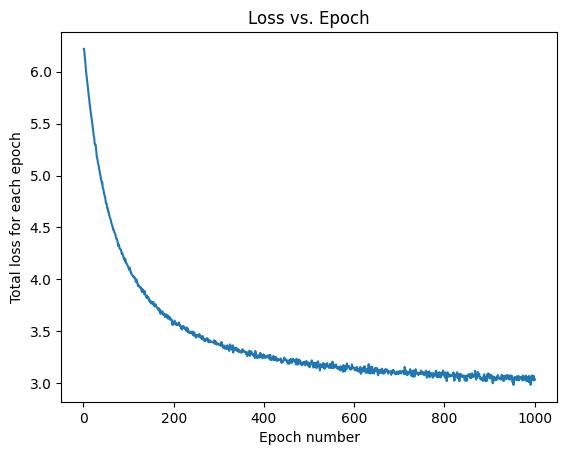

<Figure size 640x480 with 0 Axes>

In [497]:

plt.plot(list(range(1,epochs+1)), losses)
plt.xlabel("Epoch number")
plt.ylabel("Total loss for each epoch")
plt.title("Loss vs. Epoch")
plt.show()
plt.savefig(f"figures/{label_name}_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 81.57894736842105%
Accuracy for class 1 = 76.66666666666667%
Overall accuracy = 80.55555555555556%
Accuracy for class 0 = 82.48945147679325%
Accuracy for class 1 = 88.23529411764706%
Overall accuracy = 83.50694444444444%


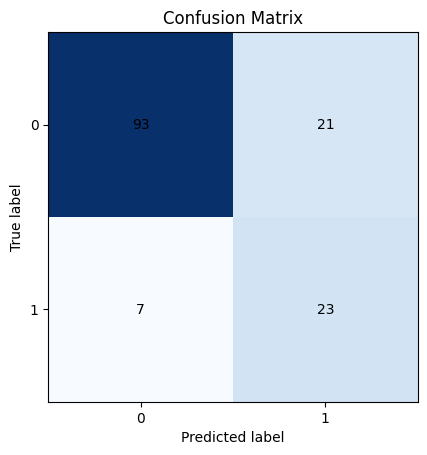

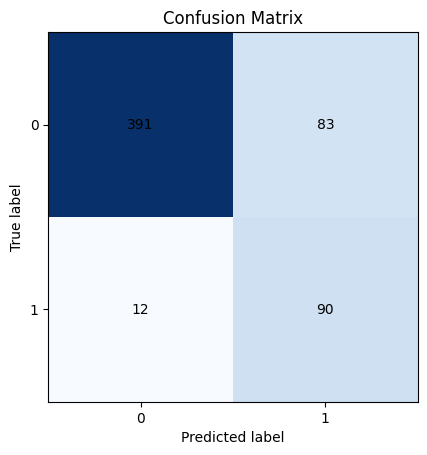

In [498]:
#TODO plot confusion matrices for confusion_1 and confusion_2
confusion_1 = evaluate_model(model, test_dataset)
confusion_2 = evaluate_model(model, training_dataset)
confusion_1.print_accuracy()
confusion_2.print_accuracy()
confusion_1.plot()
confusion_2.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

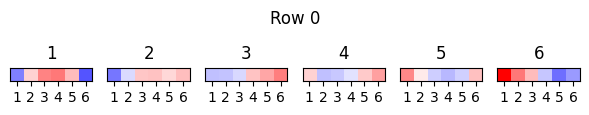

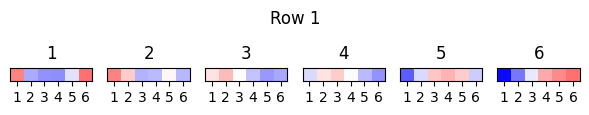

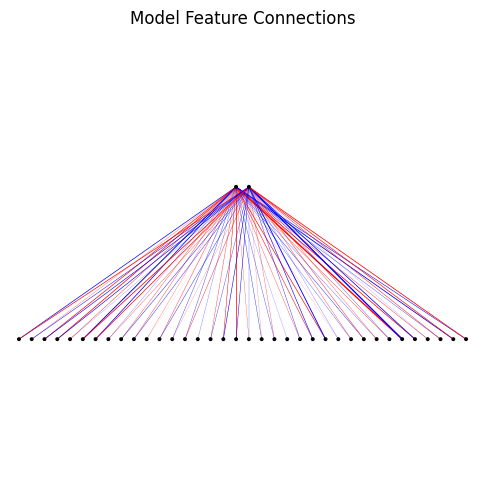

In [499]:
for i in range(2):
    model.plot_heatmap_feature(0, i)

model.plot_connections()
